In [1]:
import argparse
import os
import pickle
import pprint
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from utils import *


def set_dates(df, time, mind, maxd, isIndex=False):
    if isIndex:
        newdf = df[(df.index>=mind) & (df.index<=maxd)]
    else:
        newdf = df[(df[time]>=mind) & (df[time]<=maxd)]

    return newdf


data_dir = 'data'
country = pd.read_csv(os.path.join(data_dir, 'COVID_Cases_Restricted_Detailed_12042020.csv'), parse_dates=['cdc_report_dt', 'pos_spec_dt', 'onset_dt'])


print('all cases', country.shape)
percent_missing = country.isnull().sum() * 100 / len(country)
percent_missing
print(country.shape)

country = country[~country['res_state'].isin(['CT','IL','NJ'])]
print(country.shape)

min_date = pd.Timestamp('2020-04-01') - pd.Timedelta(days=6)
max_date = pd.Timestamp('2020-11-01')

country = country[country['current_status']=='Laboratory-confirmed case']


country = set_dates(country, 'cdc_report_dt', min_date, max_date)
print(country.shape)



country['age_group'] = country['age_group'].astype('category')
country['age_group'].cat.categories
country.loc[country['age_group'].isnull(), 'age_group'] = 'Unknown'
country['age_group'].cat.rename_categories({'Unknown': '_' + 'Unknown'}, inplace=True)
country['age_group'].cat.categories

#country['age_group']
country['age_group'].cat.rename_categories({'0 - 9 Years':'0-9', 
                                       '10 - 19 Years':'10-19',
                                       '20 - 29 Years':'20-29',
                                       '30 - 39 Years':'30-39',
                                       '40 - 49 Years':'40-49', 
                                       '50 - 59 Years':'50-59',
                                       '60 - 69 Years':'60-69',
                                       '70 - 79 Years':'70-79',
                                       '80+ Years':'80+'}, inplace=True)
country = country.rename(columns={'age_group':'Age_group', 
                                    'sex': 'Gender',
                                    'hosp_yn': 'Hospitalized',
                                    'death_yn': 'Died',
                                    'current_status': 'Case'})
country = country.reset_index()

all cases (8405079, 31)
(8405079, 31)
(7370423, 31)
(5566170, 31)


In [2]:
country['hosp_na'] = 0

country.loc[(country['Hospitalized'].isna()) | (country['Hospitalized']=='Missing'), 'hosp_na'] = 1

df = country.set_index('cdc_report_dt')

#df


<AxesSubplot:xlabel='cdc_report_dt'>

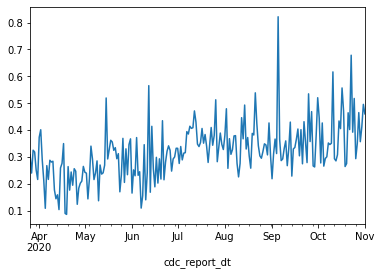

In [3]:
df = df.sort_values(by='cdc_report_dt')[['hosp_na']]
df.groupby('cdc_report_dt')['hosp_na'].mean().plot()


In [4]:
country

,index,race_ethnicity_combined,Case,cdc_report_dt,Gender,onset_dt,pos_spec_dt,Hospitalized,icu_yn,Died,...,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,Age_group,hosp_na
0,0,Unknown,Laboratory-confirmed case,2020-09-15,Female,NaT,NaT,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
1,1,Unknown,Laboratory-confirmed case,2020-09-27,Female,NaT,NaT,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
2,2,Unknown,Laboratory-confirmed case,2020-09-13,Female,NaT,NaT,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
3,3,Unknown,Laboratory-confirmed case,2020-07-31,Female,NaT,NaT,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
4,4,Unknown,Laboratory-confirmed case,2020-10-01,Female,NaT,NaT,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566165,8405074,Hispanic/Latino,Laboratory-confirmed case,2020-08-04,Male,2020-07-29,NaT,No,Missing,No,...,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10-19,0
5566166,8405075,Hispanic/Latino,Laboratory-confirmed case,2020-05-31,Male,2020-05-26,NaT,No,Missing,No,...,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10-19,0
5566167,8405076,Hispanic/Latino,Laboratory-confirmed case,2020-07-07,Male,NaT,NaT,Missing,Missing,No,...,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10-19,1
5566168,8405077,Hispanic/Latino,Laboratory-confirmed case,2020-05-28,Male,NaT,NaT,No,Missing,No,...,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10-19,0


In [5]:
min_date

Timestamp('2020-03-26 00:00:00')

In [6]:
import argparse
import os
import pickle
import pprint
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from utils import *

DATA_DIR = "../florida/data/"
time = 'Case_'
#print(time)
florida= pd.read_csv(os.path.join(
        DATA_DIR, 'florida_2020-12-04-15-35-01.csv'),index_col=False, parse_dates=[time, "ChartDate"])
florida["Age_group"] = florida["Age_group"].astype('category')
print(florida['Hospitalized'].value_counts())
print(florida['Hospitalized'].unique()) # 'YES'=1, else = 0
print(florida['Died'].unique()) # 'Yes'=1, nan = 0

#florida['Hospitalized'].isna()




florida.loc[florida['Hospitalized'].isna(), 'Hospitalized'] = 'Missing'
florida['Hospitalized'].value_counts()/len(florida)
print(florida.shape)
florida = set_dates(florida, 'Case_', min_date, max_date)
print(florida.shape)


florida['Age_group'] = florida['Age'].apply(lambda x: '0-9' if x < 10 
                                                           else ('10-19' if x < 20 
                                                                else('20-29'if x < 30 
                                                                    else('30-39' if x <40
                                                                        else('40-49' if x < 50
                                                                            else('50-59' if x < 60
                                                                                 else '60-69' if x<70
                                                                                    else '70-79' if x<80
                                                                                        else '80+' if not pd.isnull(x) 
                                                                                             else '_Unknown'))))))

florida['Age_group'] = florida['Age_group'].astype('category')
florida['Age_group'].cat.categories
order_cat = ['0-9',
                                             '10-19',
                                             '20-29',
                                             '30-39',
                                             '40-49',
                                             '50-59',
                                             '60-69',
                                             '70-79',
                                             '80+',
                                             '_Unknown']#[::-1]
florida['Age_group'].cat.reorder_categories(order_cat, inplace=True)
florida = florida.reset_index()

NO         547028
UNKNOWN    424072
YES         56809
Name: Hospitalized, dtype: int64
['UNKNOWN' 'NO' 'YES' nan]
[nan 'Yes']
(1039207, 15)
(806709, 15)


In [7]:
florida

,index,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case,Contact,Case_,EventDate,ChartDate
0,0,Dade,71.0,70-79,Female,FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020-08-30 05:00:00,2020-08-30 13:23:08,2020-08-30 05:00:00
1,1,Dade,84.0,80+,Female,FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020-08-30 05:00:00,2020-08-30 13:23:21,2020-08-30 05:00:00
2,2,Palm Beach,84.0,80+,Male,FL resident,No,NaN,YES,UNKNOWN,NaN,Yes,UNKNOWN,2020-08-30 05:00:00,2020-08-30 13:23:34,2020-08-30 05:00:00
3,3,Orange,68.0,60-69,Male,FL resident,Unknown,NaN,NO,NO,NaN,Yes,YES,2020-08-30 05:00:00,2020-08-30 13:23:33,2020-08-30 05:00:00
4,4,Volusia,18.0,10-19,Female,FL resident,No,NaN,YES,NO,NaN,Yes,UNKNOWN,2020-08-30 05:00:00,2020-08-10 00:00:00,2020-08-30 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806704,1039195,Unknown,41.0,40-49,Female,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020-08-27 05:00:00,2020-08-27 06:32:21,2020-08-27 05:00:00
806705,1039196,Unknown,60.0,60-69,Female,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020-08-13 05:00:00,2020-08-13 07:06:20,2020-08-13 05:00:00
806706,1039197,Unknown,19.0,10-19,Female,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020-09-18 05:00:00,2020-09-18 15:26:11,2020-09-18 05:00:00
806707,1039198,Unknown,20.0,20-29,Male,FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020-08-12 05:00:00,2020-08-12 07:04:54,2020-08-12 05:00:00


In [8]:
florida['Hospitalized'].unique()

array(['UNKNOWN', 'NO', 'YES', 'Missing'], dtype=object)

In [9]:
country['Hospitalized'].unique()

array(['Missing', 'Yes', 'No', 'Unknown'], dtype=object)

In [10]:
def as_category(df, var):
    df[var] = df[var].astype('category')
    return df

florida['Hospitalized'] = florida['Hospitalized'].astype('category')

florida['Hospitalized'].cat.rename_categories({'UNKNOWN':'Unknown', 'NO':'No', 'YES':'Yes'}, inplace=True)
country['Hospitalized'] = country['Hospitalized'].astype('category')
#florida['Died'] = florida['Hospitalized'].astype('category')

florida = as_category(florida, 'Died')
florida['Died'].cat.rename_categories({'UNKNOWN':'Unknown', 'NO':'No', 'YES':'Yes'}, inplace=True)


In [11]:
florida

,index,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case,Contact,Case_,EventDate,ChartDate
0,0,Dade,71.0,70-79,Female,FL resident,Unknown,NaN,UNKNOWN,Unknown,NaN,Yes,NaN,2020-08-30 05:00:00,2020-08-30 13:23:08,2020-08-30 05:00:00
1,1,Dade,84.0,80+,Female,FL resident,Unknown,NaN,UNKNOWN,Unknown,NaN,Yes,NaN,2020-08-30 05:00:00,2020-08-30 13:23:21,2020-08-30 05:00:00
2,2,Palm Beach,84.0,80+,Male,FL resident,No,NaN,YES,Unknown,NaN,Yes,UNKNOWN,2020-08-30 05:00:00,2020-08-30 13:23:34,2020-08-30 05:00:00
3,3,Orange,68.0,60-69,Male,FL resident,Unknown,NaN,NO,No,NaN,Yes,YES,2020-08-30 05:00:00,2020-08-30 13:23:33,2020-08-30 05:00:00
4,4,Volusia,18.0,10-19,Female,FL resident,No,NaN,YES,No,NaN,Yes,UNKNOWN,2020-08-30 05:00:00,2020-08-10 00:00:00,2020-08-30 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806704,1039195,Unknown,41.0,40-49,Female,Non-FL resident,Unknown,NaN,UNKNOWN,Unknown,NaN,Yes,NaN,2020-08-27 05:00:00,2020-08-27 06:32:21,2020-08-27 05:00:00
806705,1039196,Unknown,60.0,60-69,Female,Non-FL resident,Unknown,NaN,UNKNOWN,Unknown,NaN,Yes,NaN,2020-08-13 05:00:00,2020-08-13 07:06:20,2020-08-13 05:00:00
806706,1039197,Unknown,19.0,10-19,Female,Non-FL resident,Unknown,NaN,UNKNOWN,Unknown,NaN,Yes,NaN,2020-09-18 05:00:00,2020-09-18 15:26:11,2020-09-18 05:00:00
806707,1039198,Unknown,20.0,20-29,Male,FL resident,Unknown,NaN,UNKNOWN,Unknown,NaN,Yes,NaN,2020-08-12 05:00:00,2020-08-12 07:04:54,2020-08-12 05:00:00


In [12]:
def reorder_cat(df, var, order):
    #print(df)
    df[var].cat.reorder_categories(order, inplace=True)
    return df

florida = reorder_cat(florida, 'Hospitalized', ['Yes', 'No', 'Unknown', 'Missing'])
country = reorder_cat(country, 'Hospitalized', ['Yes', 'No', 'Unknown', 'Missing'])


In [14]:
hosp = {}
hosp_pec = {}
keys = ['florida', 'national', 'na_died']
orders = ['Yes', 'No', 'Unknown', 'Missing']
for i, df in enumerate([florida, country, country]):
    #'{} ({}%)'.format(df['death_yn'].value_counts(), df['death_yn'].value_counts()/len(df))
    if keys[i]!='na_died':
        cts = df['Hospitalized'].value_counts()#.tolist()
        ls = []
        for j, o in enumerate(orders):
            #        print(cts)
            ls.append(cts[o])

            hosp[keys[i]] = ls
            #print(df['Hospitalized'].value_counts())
    else:
        cts = df['Died'].value_counts()#.tolist()
        ls = []
        for j, o in enumerate(orders):
            #        print(cts)
            ls.append(cts[o])

            hosp[keys[i]] = ls
            #print(df['Died'].value_counts())
            
hosp
hosp = pd.DataFrame.from_dict(hosp)

In [15]:
f_d = []
print(florida['Died'].value_counts()[0])
f_d.append(florida['Died'].value_counts()[0])
f_d.append(0)
f_d.append(0)
f_d.append(sum(florida['Died'].isna()))
hosp['f_d'] = f_d
print(hosp)

18333
   florida  national  na_died     f_d
0    50414    369377   126994   18333
1   425985   2551008  2631070       0
2   327622    691973   588668       0
3     2688   1953812  2219438  788376


In [16]:
hosp['level']  = orders
hosp['fl_p'] = hosp['florida'] / len(florida)
hosp['na_p'] = hosp['national'] / len(country)
hosp['na_p_d'] = hosp['na_died'] / len(country)
hosp['f_p_d'] = hosp['f_d']/ len(florida)
print(hosp)

   florida  national  na_died     f_d    level      fl_p      na_p    na_p_d  \
0    50414    369377   126994   18333      Yes  0.062493  0.066361  0.022815   
1   425985   2551008  2631070       0       No  0.528053  0.458306  0.472689   
2   327622    691973   588668       0  Unknown  0.406122  0.124318  0.105758   
3     2688   1953812  2219438  788376  Missing  0.003332  0.351016  0.398737   

      f_p_d  
0  0.022726  
1  0.000000  
2  0.000000  
3  0.977274  


In [17]:
hosp['Florida'] = hosp.apply(lambda r: "{} ({:.1f}%)".format(r['florida'], 100*r['fl_p']), axis=1)
hosp['Country'] = hosp.apply(lambda r: "{} ({:.1f}%)".format(r['national'], 100*r['na_p']), axis=1)
hosp['na_d'] = hosp.apply(lambda r: "{} ({:.1f}%)".format(r['na_died'], 100*r['na_p_d']), axis=1)
hosp['fl_d'] = hosp.apply(lambda r: "{} ({:.1f}%)".format(r['f_d'], 100*r['f_p_d']), axis=1)

hosp = hosp.set_index('level')
hosp

,florida,national,na_died,f_d,fl_p,na_p,na_p_d,f_p_d,Florida,Country,na_d,fl_d
level,,,,,,,,,,,,
Yes,50414,369377,126994,18333,0.062493,0.066361,0.022815,0.022726,50414 (6.2%),369377 (6.6%),126994 (2.3%),18333 (2.3%)
No,425985,2551008,2631070,0,0.528053,0.458306,0.472689,0.000000,425985 (52.8%),2551008 (45.8%),2631070 (47.3%),0 (0.0%)
Unknown,327622,691973,588668,0,0.406122,0.124318,0.105758,0.000000,327622 (40.6%),691973 (12.4%),588668 (10.6%),0 (0.0%)
Missing,2688,1953812,2219438,788376,0.003332,0.351016,0.398737,0.977274,2688 (0.3%),1953812 (35.1%),2219438 (39.9%),788376 (97.7%)


In [18]:
print(hosp[['Florida', 'Country', 'fl_d', 'na_d']].to_latex())

\begin{tabular}{lllll}
\toprule
{} &         Florida &          Country &            fl\_d &             na\_d \\
level   &                 &                  &                 &                  \\
\midrule
Yes     &    50414 (6.2\%) &    369377 (6.6\%) &    18333 (2.3\%) &    126994 (2.3\%) \\
No      &  425985 (52.8\%) &  2551008 (45.8\%) &        0 (0.0\%) &  2631070 (47.3\%) \\
Unknown &  327622 (40.6\%) &   691973 (12.4\%) &        0 (0.0\%) &   588668 (10.6\%) \\
Missing &     2688 (0.3\%) &  1953812 (35.1\%) &  788376 (97.7\%) &  2219438 (39.9\%) \\
\bottomrule
\end{tabular}



In [19]:
df

,index,race_ethnicity_combined,Case,cdc_report_dt,Gender,onset_dt,pos_spec_dt,Hospitalized,icu_yn,Died,...,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,Age_group,hosp_na
0,0,Unknown,Laboratory-confirmed case,2020-09-15,Female,NaT,NaT,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
1,1,Unknown,Laboratory-confirmed case,2020-09-27,Female,NaT,NaT,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
2,2,Unknown,Laboratory-confirmed case,2020-09-13,Female,NaT,NaT,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
3,3,Unknown,Laboratory-confirmed case,2020-07-31,Female,NaT,NaT,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
4,4,Unknown,Laboratory-confirmed case,2020-10-01,Female,NaT,NaT,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566165,8405074,Hispanic/Latino,Laboratory-confirmed case,2020-08-04,Male,2020-07-29,NaT,No,Missing,No,...,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10-19,0
5566166,8405075,Hispanic/Latino,Laboratory-confirmed case,2020-05-31,Male,2020-05-26,NaT,No,Missing,No,...,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10-19,0
5566167,8405076,Hispanic/Latino,Laboratory-confirmed case,2020-07-07,Male,NaT,NaT,Missing,Missing,No,...,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10-19,1
5566168,8405077,Hispanic/Latino,Laboratory-confirmed case,2020-05-28,Male,NaT,NaT,No,Missing,No,...,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10-19,0


In [20]:
df = hosp[['Florida', 'fl_d', 'Country', 'na_d']]

multindex = list(zip(['Florida']*2 + ['Country']*2, ['Hospitalization', 'Death']*2))
mulindex = pd.MultiIndex.from_tuples(multindex, names=['data', 'outcome'])
df.columns = mulindex
print(df.to_latex())

\begin{tabular}{lllll}
\toprule
data & \multicolumn{2}{l}{Florida} & \multicolumn{2}{l}{Country} \\
outcome & Hospitalization &           Death &  Hospitalization &            Death \\
level   &                 &                 &                  &                  \\
\midrule
Yes     &    50414 (6.2\%) &    18333 (2.3\%) &    369377 (6.6\%) &    126994 (2.3\%) \\
No      &  425985 (52.8\%) &        0 (0.0\%) &  2551008 (45.8\%) &  2631070 (47.3\%) \\
Unknown &  327622 (40.6\%) &        0 (0.0\%) &   691973 (12.4\%) &   588668 (10.6\%) \\
Missing &     2688 (0.3\%) &  788376 (97.7\%) &  1953812 (35.1\%) &  2219438 (39.9\%) \\
\bottomrule
\end{tabular}



In [ ]:
florida['Died'] 



In [ ]:
country['Died'].value_counts()

In [ ]:
# fill in the categories